In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline
import glob


In [32]:
LL = glob.glob('1315/dataTables/*-LL.dat')
RR =  glob.glob('1315/dataTables/*-RR.dat')

time = 60

ll = []
llErr = []
llMjd = []

rr = []
rrErr = []
rrMjd = []

master = []
dtmin = []
stI = []
stV = []
stErr = []
polFrac = []

for i in LL:
    x = pd.read_table(i)
    x = x[x['nsamp']>1500]
    date = int(x['mjd'].mean())
    if  date >= 57704 or date <= 57773:
        x = binning(x,time,2)
        ll.append(x['re'])
        llErr.append(x['ure'])
        llMjd.append(date)
    else: 
        x = binning(x,time)
        ll.append(x['re'])
        llErr.append(x['ure'])
        llMjd.append(date)
    
for i in RR:
    x = pd.read_table(i)
    x = x[x['nsamp']>1500]
    date = int(x['mjd'].mean())
    if  date >= 57704 or date <= 57773:
        x = binning(x,time,2)
        rr.append(x['re'])
        rrErr.append(x['ure'])
        dtmin.append(x['dtmin'])
        rrMjd.append(date)
    else: 
        x = binning(x,time)
        rr.append(x['re'])
        rrErr.append(x['ure'])
        dtmin.append(x['dtmin'])
        rrMjd.append(date)

ll = np.array(ll)
llErr = np.array(llErr)

rr = np.array(rr)
rrErr = np.array(rrErr)

dtmin = np.array(dtmin)

stI = (rr+ll)*.5
stV = (rr-ll)*.5
frac = stV/stI
stErr = ((rrErr**2+llErr**2)**(.5))*.5


In [33]:
left = pd.DataFrame(data={'mjd':llMjd,'ll':ll,'ull':llErr})
right = pd.DataFrame(data={'dtmin':dtmin,'mjd':rrMjd,'rr':rr,'urr':rrErr})

In [34]:
master = pd.merge(left,right,on='mjd')

In [35]:
master = master.sort_values('mjd')
master = master.rename(columns={ 'll_x':'ll', 'ull_x':'ull', 'rr_y':'rr', 'urr_y':'urr'})

In [36]:
stI = []
stV = []
stErr = []
mjd = []
dtmin = []
frac = []
fracErr = []

for i in range(master.shape[0]):
    dt = master.iloc[i]
    stI.append((dt['rr']+dt['ll'])*.5)
    stV.append((dt['rr']-dt['ll'])*.5)
    stErr.append(np.sqrt(dt['urr']**2+dt['ull']**2)*.5)
    dtmin.append(dt['dtmin'])
    mjd.append(dt['mjd'])
    frac.append(((dt['rr']-dt['ll'])*.5)/(dt['rr']+dt['ll'])*.5)
    fracErr.append(np.abs(((dt['rr']-dt['ll'])*.5)/(dt['rr']+dt['ll'])*.5)*np.sqrt((dt['urr']/dt['rr'])**(2)+(dt['ull']/dt['ll'])**2))
    
stI = np.array(stI)
stV = np.array(stV)
stErr = np.array(stErr)
mjd = np.array(mjd)
dtmin = np.array(dtmin)
frac = np.array(frac)
fracErr = np.array(fracErr)

In [37]:
stokes = pd.DataFrame(data={'mjd':mjd,'dtmin':dtmin,'stI':stI,'stV':stV,'stErr':stErr,'frac':frac,'fracErr':fracErr})

In [52]:
stV[0]

0     38.827423
1      2.305037
2     36.295092
3      0.828254
4     -3.111653
5    -26.793887
6    -28.061152
7      5.691151
8    -28.003708
9     -0.505089
10     1.137800
11     6.089002
12     8.062329
13   -10.926390
14    -6.104873
15    10.349973
Name: re, dtype: float64

0   0.16517436941900626
1   0.1542188824537779
2   0.15248326202164514
3   0.05454290067470448
4   0.06032227375570867
5   0.1339735543183801
6   0.11623037214739783
7   0.08634772275100762
8   0.08311930307498391
9   0.06758102153592047
10   0.11535573168755917
11   0.24042922553512103
12   0.11803586697163732
13   0.27454898432636127
14   0.366630943440275
15   0.34126780556955866
16   0.7639851489378653
17   0.3693967867655581
18   0.5133363361260079
19   0.1036307676091062


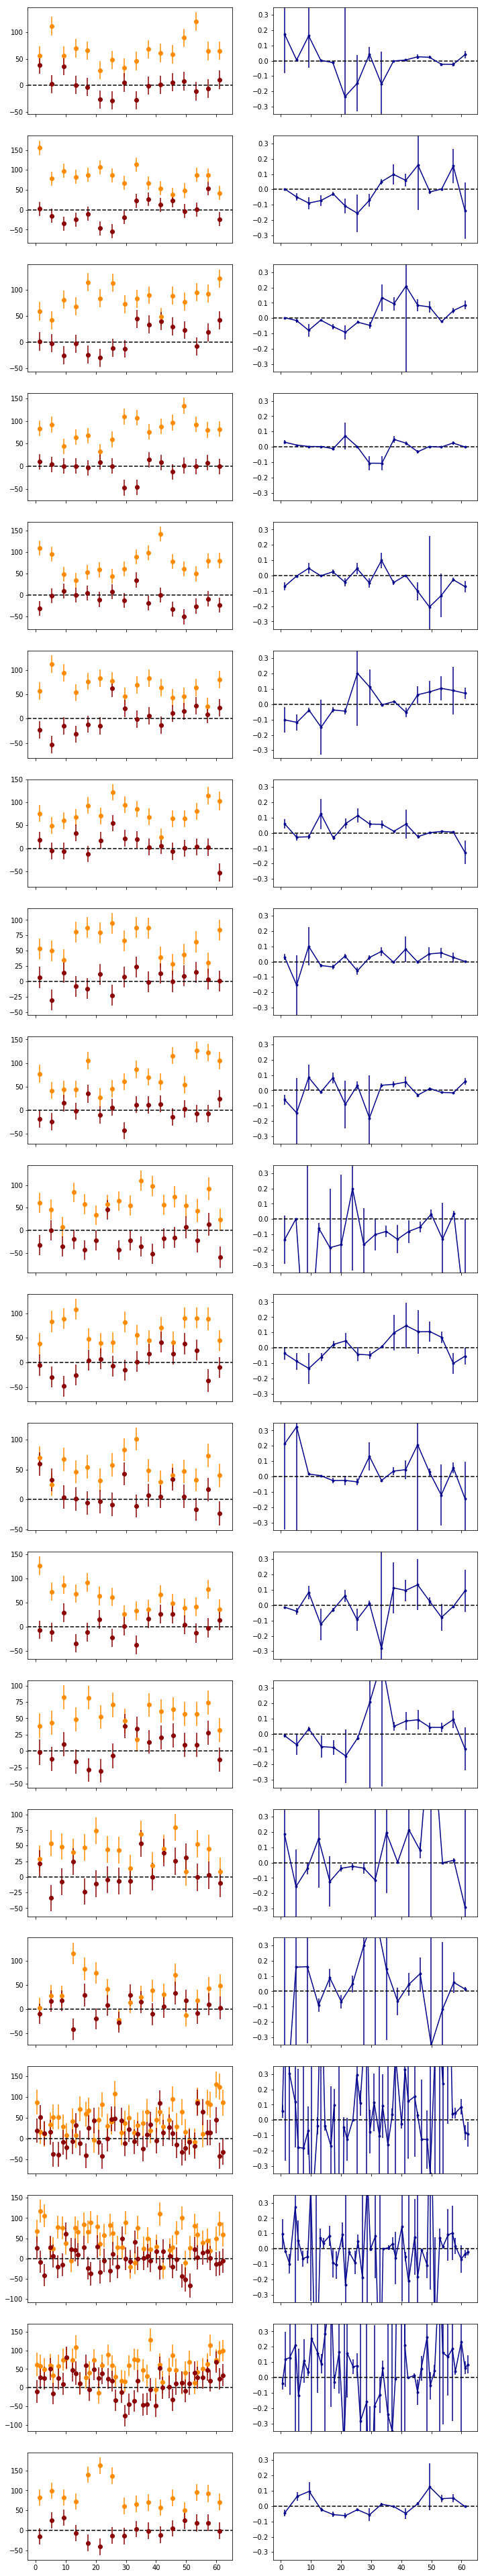

In [43]:
fig, ax = plt.subplots(nrows=20,ncols=2,sharex=True,figsize=(12,70))

for i in range(20):
    yerr = stokes.iloc[i][4]
    ax[i][0].errorbar(stokes.iloc[i][1],stokes.iloc[i][2],yerr=stokes.iloc[i][4],linestyle='None',color='darkorange',marker='o')
    ax[i][0].errorbar(stokes.iloc[i][1],stokes.iloc[i][3],yerr=stokes.iloc[i][4],linestyle='None',color='darkred',marker='o')
    ax[i][0].axhline(y=0,color='black',linestyle='dashed')
    ax[i][1].errorbar(stokes.iloc[i][1],stokes.iloc[i][5],yerr=stokes.iloc[i][6],color='darkblue',marker='.')
    ax[i][1].axhline(y=0,color='black',linestyle='dashed')
    ax[i][1].set_ylim(-0.35,0.35)
    print(i,' ',np.percentile(stokes.iloc[i][5],95))


    
plt.show()

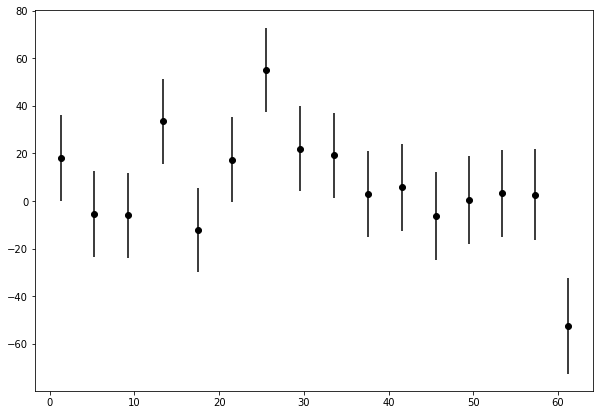

In [40]:
i = 6

plt.figure(figsize=(10,7))
plt.errorbar(stokes.iloc[i][1],stokes.iloc[i][3],yerr=stokes.iloc[i][4],label='%s'%(stokes.iloc[i][0]),linestyle='None',color='k',marker='o')
plt.show()

In [19]:
x

NameError: name 'x' is not defined